## TECHIN 513 HW1 – Modifying Signals

Sam Wong

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
#%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 
import simpleaudio as sa
from scipy.io import wavfile as wav
from scipy import signal as sig
from decimal import *


## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

In [2]:
# Assignment 1 - Time Scaling Function

# Part A

# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale_old(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t


In [3]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
fs1, x1 = wav.read("train32.wav")
print("The sample rate is ",fs1, " and the shape is ", x1.shape)
fs2 = fs1/2
wav.write("train32_a.wav",int(fs2),x1)
fs3= 1.5*fs1
wav.write("train32_b.wav",int(fs3),x1)
# Part C
wav_obj = sa.WaveObject.from_wave_file('train32.wav')
wav_obj2 = sa.WaveObject.from_wave_file('train32_a.wav')
wav_obj3 = sa.WaveObject.from_wave_file('train32_b.wav')

play_obj_1 = wav_obj.play()
play_obj_1.wait_done()

play_obj_2 = wav_obj2.play()
play_obj_2.wait_done()

play_obj_3 = wav_obj3.play()
play_obj_3.wait_done()


The sample rate is  32000  and the shape is  (50313,)


###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.

Solution: When a higher sample rate is used, the audio became higher pitched and shorter duration. When a lower sample rate is used,  the audio became lower pitched with longer duration.

## Assignment 2 -- Amplitude Operations on Signals

In [4]:
# Assignment 2 - Amplitude Operations on Signals
play_obj_1 = wav_obj.play()
play_obj_1.wait_done()
# Part A
n0 = 16000
s1 = np.concatenate((np.ones(n0),0.2*np.ones(len(x1)-n0)))
v1 = x1*s1
print("x1",x1)
wav.write("new.wav",int(fs1),v1.astype(np.int16))
wav_obj4 = sa.WaveObject.from_wave_file('new.wav')
play_obj_4 = wav_obj4.play()
play_obj_4.wait_done()


x1 [-901 -943 -646 ...  330  169   45]


In [5]:

# Part B
r1 = np.arange(1,0,-(1/len(x1)))

v2 = r1*x1
wav.write("train32_d.wav",int(fs1),v2.astype(np.int16))
wav_obj5 = sa.WaveObject.from_wave_file('train32_d.wav')

play_obj_5= wav_obj5.play()
play_obj_5.wait_done()


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use? 

Solution: Signal v1 never reached volume 0 and Signal v1 reached volume 0 in the end. The volume would double the original value. If we want a smmoth and faster decay in amplitude, we would define a signal where there would be a linear decay for range [0,0.5].


## Assignment 3 -- Time Scaling Audio Signals 

In [6]:
# Assignment 3 -- Title of assignment 3

# Part A
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x.astype("float16"),d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

In [7]:
#B: Load WAV file and apply transformation
fs, x1 = wav.read('train32.wav')

o,t_o = timescale(x1, fs, 1)#Original Waveform
w, t_w = timescale(x1, fs, 2)# x2 Speed
v, t_v = timescale(x1, fs, 0.5)# x0.5 Speed

z_reverse = np.flip(x1)
z, t_z = timescale(z_reverse, fs, 1)# Reversed



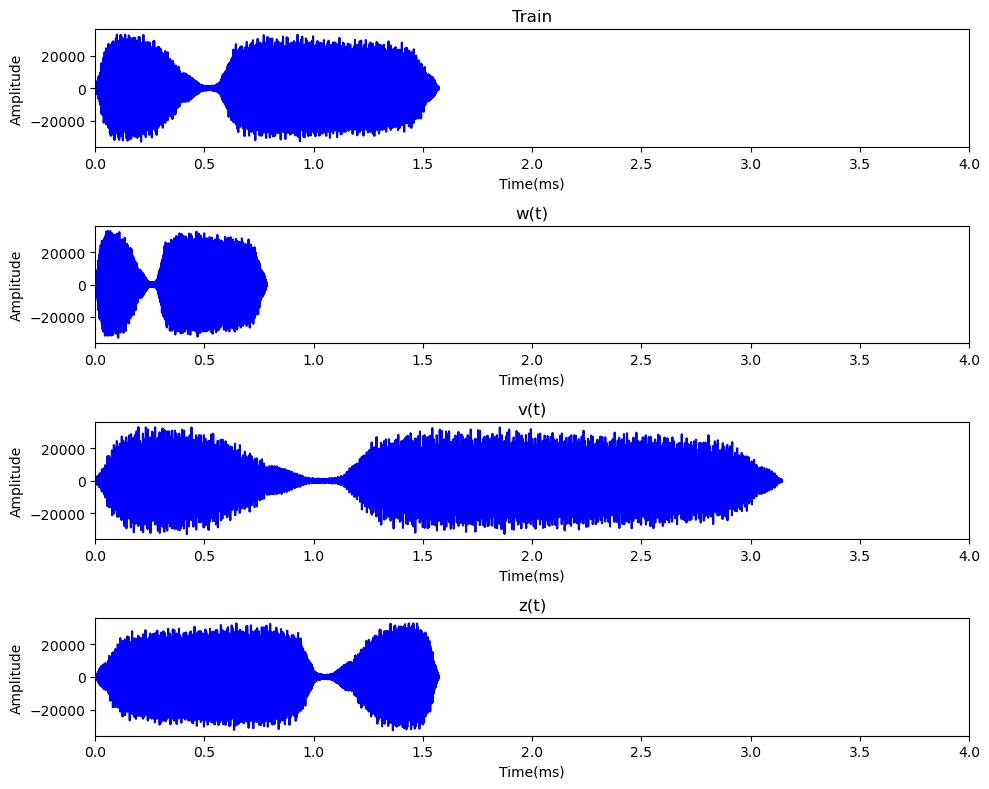

In [8]:
#C: Plot sound signal
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
plt.xlim(0, 4.0)


ax[0].plot(t_o,o, color='blue')
ax[0].set_xlabel('Time(ms)')
ax[0].set_ylabel('Amplitude')
ax[0].title.set_text('Train')
ax[0].set_xlim([0,4])

ax[1].plot(t_w,w, color='blue')
ax[1].set_xlabel('Time(ms)')
ax[1].set_ylabel('Amplitude')
ax[1].title.set_text('w(t)')
ax[1].set_xlim([0,4])



ax[2].plot(t_v,v, color='blue')
ax[2].set_xlabel('Time(ms)')
ax[2].set_ylabel('Amplitude')
ax[2].title.set_text('v(t)')
ax[2].set_xlim([0,4])


ax[3].plot(t_z,z, color='blue')
ax[3].set_xlabel('Time(ms)')
ax[3].set_ylabel('Amplitude')
ax[3].title.set_text('z(t)')
ax[3].set_xlim([0,4])


plt.tight_layout()


In [9]:
# Save the resampled signal to a new WAV file
wav.write('train_timescaled_2.wav', int(fs), w.astype(np.int16))
wav.write('train_timescaled_0.5.wav', int(fs), v.astype(np.int16))
wav.write('train_timescaled_flip.wav', int(fs), z.astype(np.int16))

#Play Each audio file
play_obj_1 = wav_obj.play()
play_obj_1.wait_done()
wav_obj = sa.WaveObject.from_wave_file('train_timescaled_2.wav')
play_obj= wav_obj.play()
play_obj.wait_done()
wav_obj = sa.WaveObject.from_wave_file('train_timescaled_0.5.wav')
play_obj= wav_obj.play()
play_obj.wait_done()
wav_obj = sa.WaveObject.from_wave_file('train_timescaled_flip.wav')
play_obj= wav_obj.play()
play_obj.wait_done()


###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

There will be 4 figures, displaying each plots instead of one figure displaying 4 plots. 

## Assignment 4 -- Time Shift Operations

In [10]:
# Part A
# TODO: Code that solves A
def timeshift(x,fs,t0):
    if(t0 == 0):
        t= np.arange(0,len(y),1)*(1.0/fs)
        return x,t
    
    #Find the integer shift n0 given t0 and fs.
    n0=np.zeros(int(abs(t0)*fs))
    # if t0 is negative, then create y by concatenating a zero vector with the original signal.
    if(t0 < 0):
        y=np.concatenate((n0,x))
        t= np.arange(0,len(y),1)*(1.0/fs)
    
    #For a time advance, create y by copying the portion of the starting from n0 
    if(t0 > 0):
        y=x[int(t0*fs):]
        y=np.concatenate((y,n0))
        t= np.arange(0,len(y),1)*(1.0/fs)
    return y,t


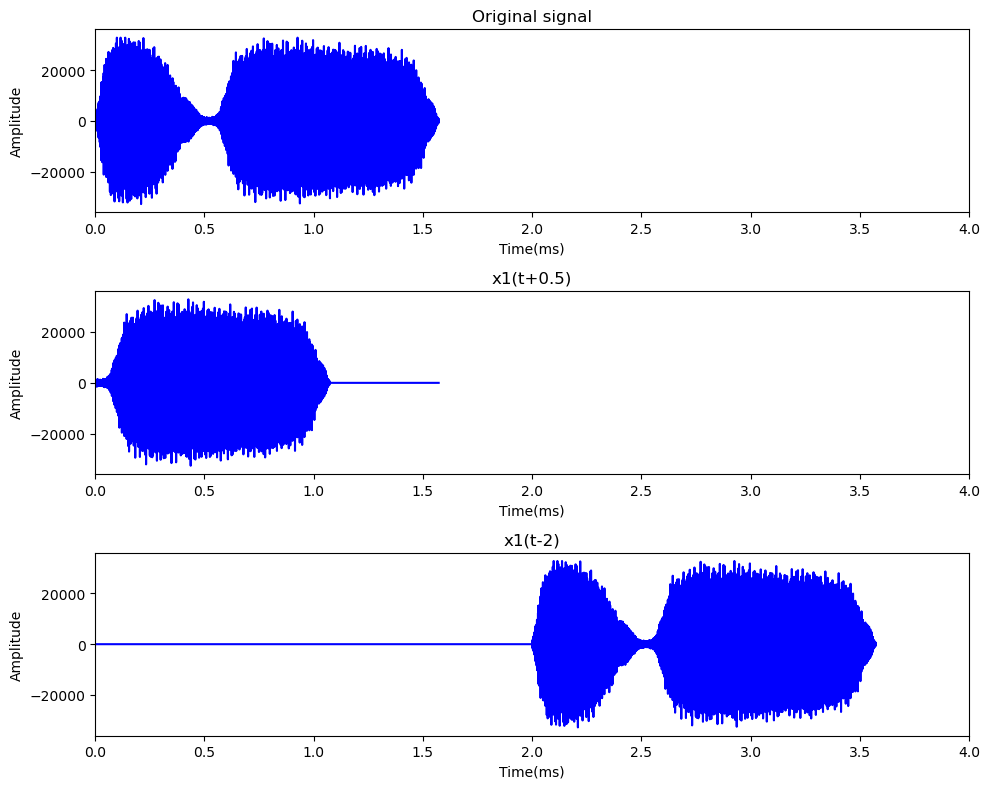

In [11]:
#Use the function to create x1(t+0.5) and x1(t-2)
a,a_t = timeshift(x1,fs,0.5)
b,b_t = timeshift(x1,fs,-2)
fig, bx = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
plt.xlim(0, 4.0)

bx[0].plot(t_o,o, color='blue')
bx[0].set_xlabel('Time(ms)')
bx[0].set_ylabel('Amplitude')
bx[0].title.set_text('Original signal')
bx[0].set_xlim([0,4])

bx[1].plot(a_t,a, color='blue')
bx[1].set_xlabel('Time(ms)')
bx[1].set_ylabel('Amplitude')
bx[1].title.set_text('x1(t+0.5)')
bx[1].set_xlim([0,4])

bx[2].plot(b_t,b, color='blue')
bx[2].set_xlabel('Time(ms)')
bx[2].set_ylabel('Amplitude')
bx[2].title.set_text('x1(t-2)')
bx[2].set_xlim([0,4])

plt.tight_layout()


In [12]:
wav.write('train_shift_0.5.wav', fs, a.astype(np.int16))
wav.write('train_shift_2.wav', fs, b.astype(np.int16))

play_obj_1 = wav_obj.play()
play_obj_1.wait_done()
wav_obj = sa.WaveObject.from_wave_file('train_shift_0.5.wav')
play_obj= wav_obj.play()
play_obj.wait_done()
wav_obj = sa.WaveObject.from_wave_file('train_shift_2.wav')
play_obj= wav_obj.play()
play_obj.wait_done()

### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.

My current implementation takes care of when the shift is 0 since I have added an if statement to create a time vector based on the original signal. And if the advance is bigger than the original signal, since the index of int(t0 x fs) is larger than the length of the array, we will concatenate zeros in front of an empty array. Hence the output signal will be 0.